/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:54: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  Senti_Mean = Social_df.groupby([Social_df['Date']]).mean()
/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

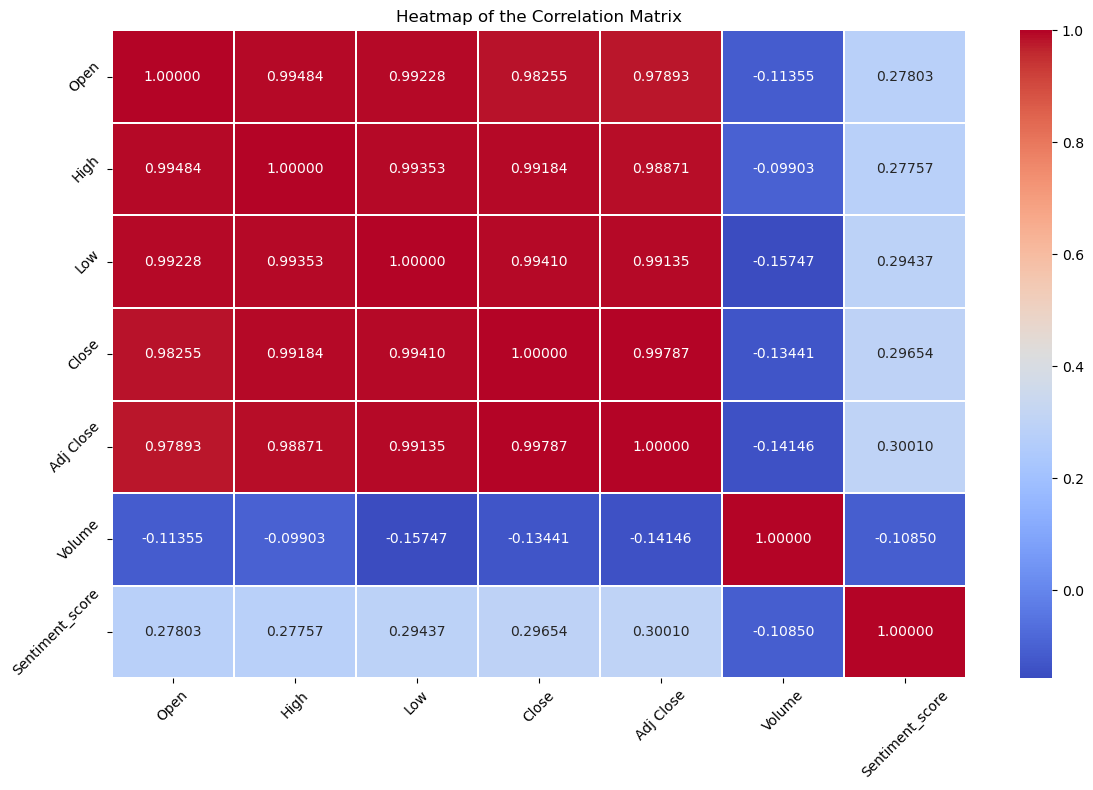

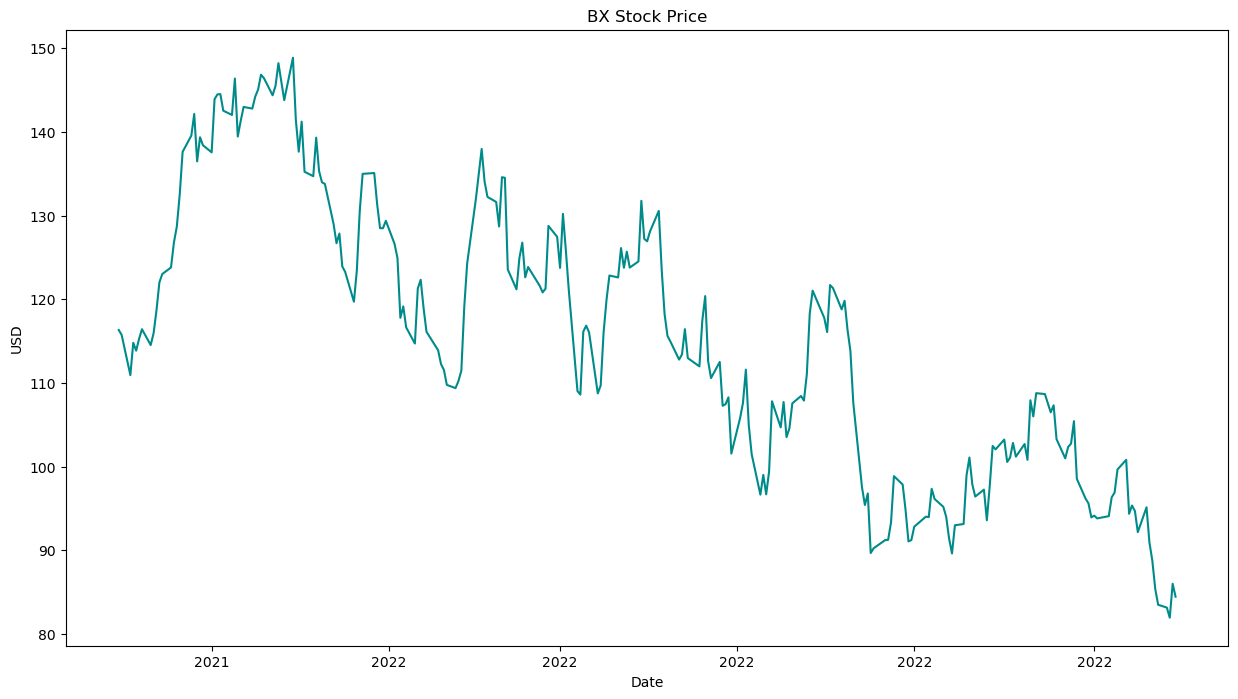

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     24.10
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.65e-06
Time:                        09:56:43   Log-Likelihood:                -1049.7
No. Observations:                 252   AIC:                             2103.
Df Residuals:                     250   BIC:                             2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.9080      3.651     26.819      0.0

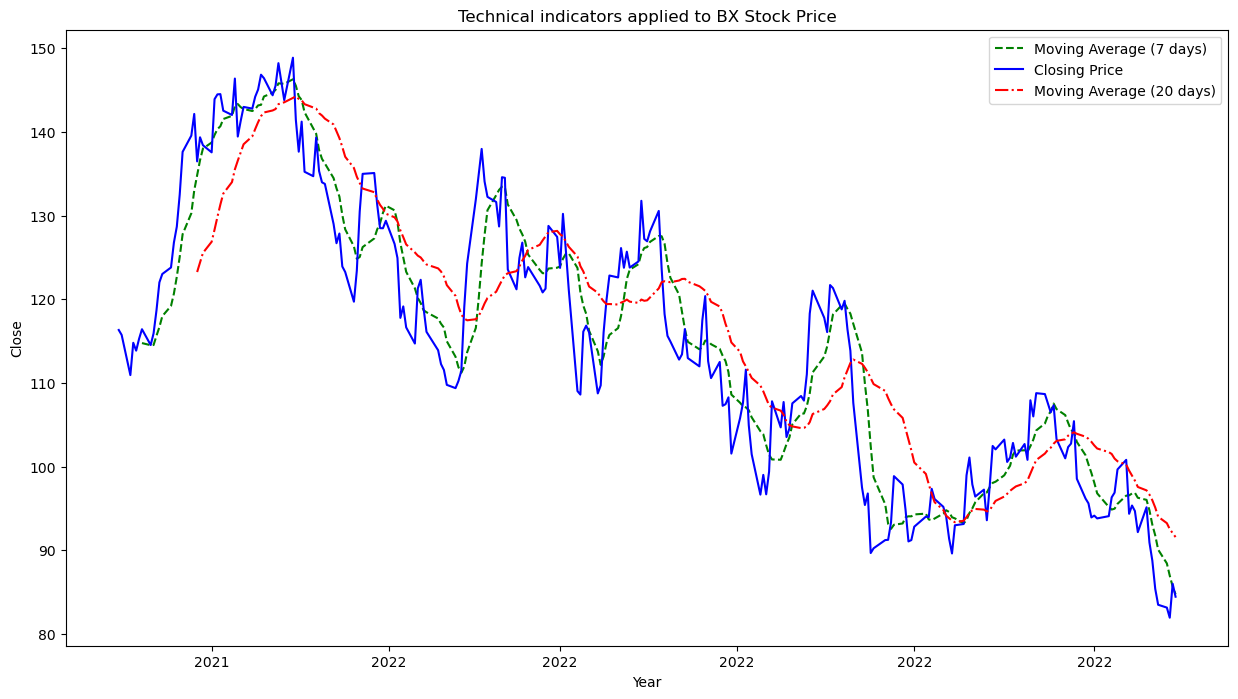

/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['Date'] = stocks_df['Date'].dt.date
/var/folders/xw/q4rrdz7x6d36w0xpkhw5pn2w0000gn/T/ipykernel_80580/2886109779.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

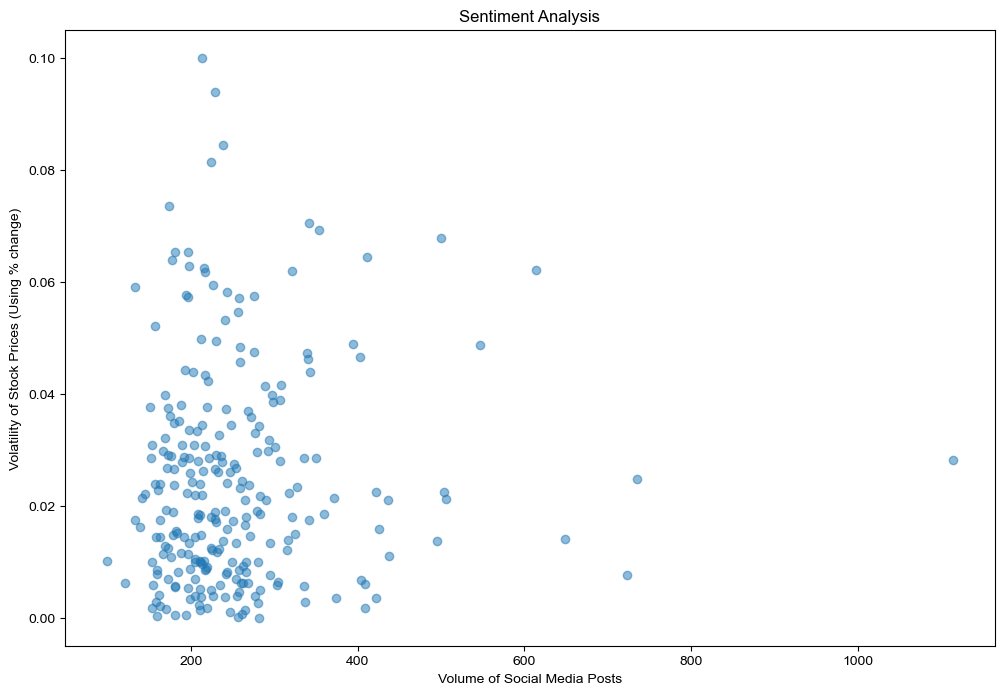

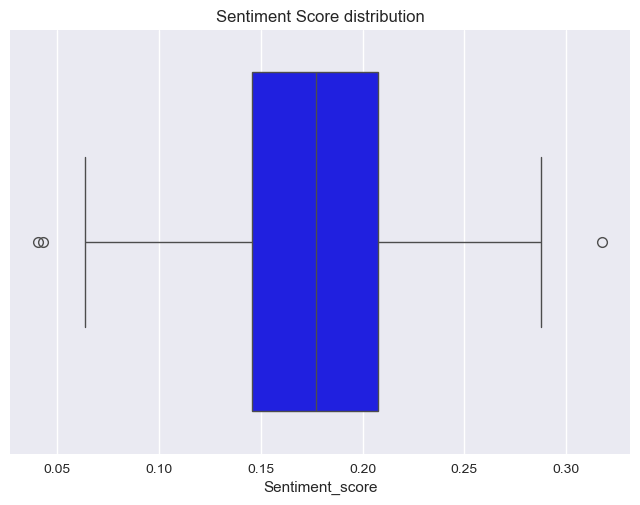

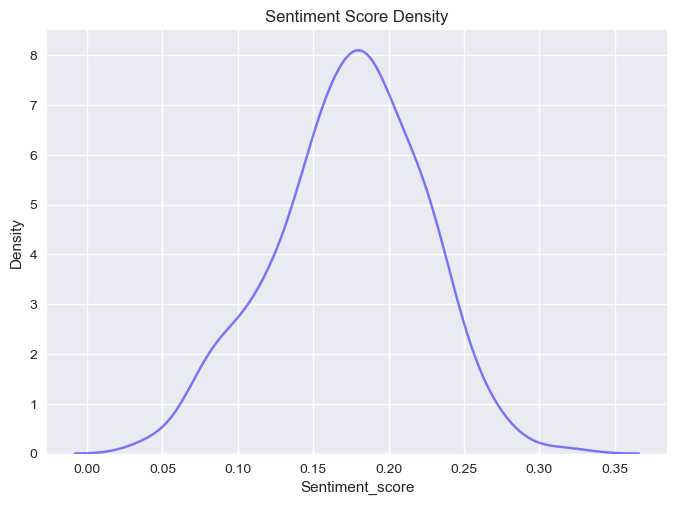

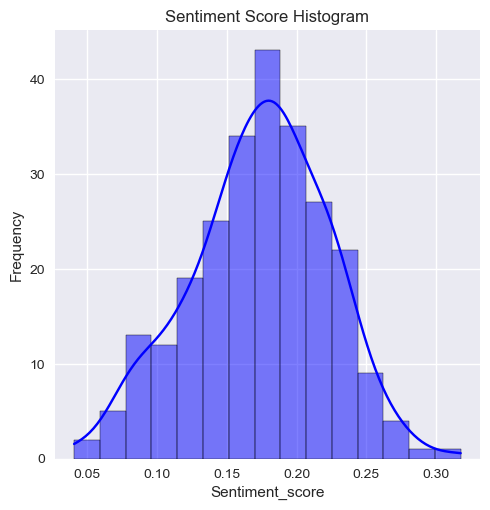

In [2]:
#-----------------------------------Module import Setup------------------------------------

#Import modules
import re
import opendatasets as od
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import requests
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import unicodedata


# #-----------------------------------Dataframe Setup-----------------------------------

#Read .csv files
Social = pd.read_csv("/Users/ben/Downloads/Empirical_Project/Social/stock_tweets.csv")
Stocks = pd.read_csv("/Users/ben/Downloads/Empirical_Project/Social/stock_yfinance_data.csv")
stock_name = 'BX'
#Make copys of the dataframe in order to not modify the original
Social_df = Social.copy()
Social_df["Sentiment_score"] = ''
#Implement VADER to generate sentiment values
sentiment_analyser = SentimentIntensityAnalyzer()
for indx, row in Social_df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', Social_df.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyser.polarity_scores(sentence_i)
        Social_df.at[indx, 'Sentiment_score'] = sentence_sentiment['compound']
    except TypeError:
        print (Social_df.loc[indexx, 'Tweet'])
        print (indx)
        break

#Manipulating Social Date column 
Social_df['Date'] = pd.to_datetime(Social_df['Date'])
Social_df['Date'] = Social_df['Date'].dt.date

#Get mean sentiment values for each stock in a that specific day
Senti_Mean = Social_df.groupby([Social_df['Date']]).mean()

#Manipulating Stocks Date column
stocks_df = Stocks[Stocks['Stock Name'] == stock_name]
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Date'] = stocks_df['Date'].dt.date

#Merging 
final_df_twitter = stocks_df.join(Senti_Mean, how="left", on="Date")

#Calculate the correlation matrix
corr_matrix = final_df_twitter.corr()

#Create a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=.05)
plt.title('Heatmap of the Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

#Create plot for specific stock
# final_df_twitter = final_df_twitter.drop(columns=['Stock Name'])
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df_twitter['Date'], final_df_twitter['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

X = final_df_twitter['Sentiment_score'].values.reshape(-1, 1)
y = final_df_twitter['Close'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

def tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Calculates moving average for a week
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Calculates moving average for a month
    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean() #Calculates the Moving Average Convergence Divergence(MACD)
    data['20SD'] = data.iloc[:, 4].rolling(20).std() #Calculates 20*StdDev
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean() #Calculates Exponential Moving Average
    return data

final_indicator_df_twitter = tech_ind(final_df_twitter)
dataset = final_indicator_df_twitter.iloc[20:,:].reset_index(drop=True)
def plot_tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8))
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)
    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='blue')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title(f"Technical indicators applied to {stock_name} Stock Price")
    plt.ylabel('Close')
    plt.xlabel("Year")
    plt.legend()
    plt.show()
plot_tech_ind(final_indicator_df_twitter)

# Calculate the number of social media posts for each day
Social_df['Date'] = pd.to_datetime(Social_df['Date'])
Social_df['Date'] = Social_df['Date'].dt.date
Social_df = Social_df.groupby(['Date']).size().reset_index(name='Volume of posts')

# Calculate the volatility of the stock prices for each day
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Date'] = stocks_df['Date'].dt.date
stocks_df['Volatility'] = stocks_df['Close'].pct_change().abs()

# Merge the two dataframes
Scatter_df = stocks_df.merge(Social_df, on='Date', how='left')

# Create a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(Scatter_df['Volume of posts'], Scatter_df['Volatility'], alpha = 0.5)
plt.style.use("seaborn-v0_8")
plt.xlabel('Volume of Social Media Posts')
plt.ylabel('Volatility of Stock Prices (Using % change)')
plt.title('Sentiment Analysis')
plt.show()



#-----------------------------------Kaggle API Setup------------------------------------

# api = KaggleApi()

# # Authenticate with your Kaggle API credentials
# api.authenticate()

# # Specify the dataset you want to download
# dataset_name = "gpreda/reddit-wallstreetsbets-posts"

# # Define the directory where you want to save the downloaded dataset
# download_dir = "RedditWSB"

# #Download the dataset
# api.dataset_download_files(dataset_name, path=download_dir, unzip=True)

#-----------------------------------Reddit Posts Setup-----------------------------------

#Intialise sentiment analyser
sentiment_analyser = SentimentIntensityAnalyzer()
Reddit_WSB = pd.read_csv("/Users/ben/Downloads/Empirical_Project/RedditWSB/reddit_wsb.csv")
Reddit_WSB.drop(columns=['score', 'id','url','comms_num','created'], inplace=True)

#Name the autogenerated index
Reddit_WSB.index.name = 'Index'

#Drop rows based on if body contains NaN (Can't post if title is NaN so no worries)
Reddit_WSB.dropna(subset=['body'], inplace=True)
#Remove time from timestamp for ease
Reddit_WSB.timestamp = pd.to_datetime(Reddit_WSB.timestamp).dt.date

#Create columns and apply new function to make sentiment values more efficiently compared to loop
Reddit_WSB['Sentiment_score (Title based)'] = Reddit_WSB['title'].apply(lambda x: sentiment_analyser.polarity_scores(x)['compound'])
Reddit_WSB['Sentiment_score (Body based)'] = Reddit_WSB['body'].apply(lambda x: sentiment_analyser.polarity_scores(x)['compound'])
Reddit_WSB['Avg Sentiment Score'] = (Reddit_WSB['Sentiment_score (Body based)'] + Reddit_WSB['Sentiment_score (Title based)'])/2


# #-----------------------------------Model Training (Gradient Boosting)-----------------------------------

# X = final_df_twitter[['Sentiment_score']]
# y = final_df_twitter['Close']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# gb_regressor = GradientBoostingRegressor()
# gb_regressor.fit(X_train_scaled, y_train)
# train_score = gb_regressor.score(X_train_scaled, y_train)
# test_score = gb_regressor.score(X_test_scaled, y_test)



# # Define the hyperparameters to tune
# param_grid_GB = {
#     'n_estimators': [300, 400, 500],
#     'learning_rate': [0.0001, 0.001, 0.1],
#     'max_depth': [5, 7, 9]
# }

# # Initialize the model
# gb_model = GradientBoostingRegressor()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(gb_model, param_grid_GB, cv=5, scoring='r2')

# # Fit the model to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Train the model with the best hyperparameters
# best_gb_model = GradientBoostingRegressor(**grid_search.best_params_)
# best_gb_model.fit(X_train_scaled, y_train)

# # Evaluate the model
# train_score = best_gb_model.score(X_train_scaled, y_train)
# test_score = best_gb_model.score(X_test_scaled, y_test)
# print("\nGradient Boosted Model Evaluation")
# print("Training R^2 Score:", train_score)
# print("Testing R^2 Score:", test_score)

# #-----------------------------------Model Training (Random Forests)-----------------------------------
# # Define the hyperparameters to tune
# param_grid_RF = {
#     'n_estimators': [300, 400, 500, 600],
#     'max_depth': [5, 7, 9],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize the model
# rf_model = RandomForestRegressor()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(rf_model, param_grid_RF, cv=5, scoring='r2')

# # Fit the model to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Train the model with the best hyperparameters
# best_rf_model = RandomForestRegressor(**grid_search.best_params_)
# best_rf_model.fit(X_train_scaled, y_train)

# # Evaluate the model
# train_score = best_rf_model.score(X_train_scaled, y_train)
# test_score = best_rf_model.score(X_test_scaled, y_test)
# print("\nRandom Forests Model Evaluation")
# print("Training R^2 Score:", train_score)
# print("Testing R^2 Score:", test_score)


sns.boxplot(x='Sentiment_score', data=final_df_twitter, color ='blue')
plt.title("Sentiment Score distribution")
ax.set_xlim(-1.2, 1.2)
plt.savefig("Boxplot.png")
plt.show()

sns.kdeplot(final_df_twitter['Sentiment_score'],color='blue', linewidth = 1.75, alpha=0.5)
plt.title("Sentiment Score Density")
plt.savefig("KDE_plot.png")

sns.displot(data=final_df_twitter["Sentiment_score"], kde=True, color='blue', alpha=0.5)
plt.title("Sentiment Score Histogram")
plt.ylabel("Frequency")
plt.savefig("Dis_plot.png")

plt.show()